In [332]:
import numpy as np
import pandas as pd
import copy, math

In [333]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [334]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [335]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [336]:
#Median 
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

In [337]:
#Mode
test.fillna({
    'MSZoning':test['MSZoning'].mode()[0],
    'Exterior1st': test['Exterior1st'].mode()[0],
    'Exterior2nd': test['Exterior2nd'].mode()[0],
    'KitchenQual': test['KitchenQual'].mode()[0],
    'Functional': test['Functional'].mode()[0],
    'SaleType': test['SaleType'].mode()[0]
}, inplace=True)
train.fillna({
    'Electrical':train['Electrical'].mode()[0]
}, inplace=True)


In [338]:
cols_with_none = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                   'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                   'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
train[cols_with_none] = train[cols_with_none].fillna("None")
test[cols_with_none] = test[cols_with_none].fillna("None")

In [339]:
cols_with_0 = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
                'GarageCars', 'GarageArea']
train[cols_with_0] = train[cols_with_0].fillna(0)
test[cols_with_0] = test[cols_with_0].fillna(0)


In [340]:
cols_object = train.select_dtypes(include='object').columns
print(cols_object)
cols_objecttest = test.select_dtypes(include='object').columns
print(cols_objecttest)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 

In [341]:
#One Hot Encoding
train = pd.get_dummies(train, columns=['MSZoning', 'Street', 'Alley', 'LotShape',
                                       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                                       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                                       'Electrical','GarageType', 'Fence', 'MiscFeature',
                                       'SaleType', 'SaleCondition'],drop_first=True)
test = pd.get_dummies(test, columns=['MSZoning', 'Street', 'Alley', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                                     'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                                     'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                                     'Electrical', 'GarageType', 'Fence', 'MiscFeature',
                                     'SaleType', 'SaleCondition'],drop_first=True)
bool_cols = train.select_dtypes('bool').columns
train[bool_cols] = train[bool_cols].astype(int)

bool_cols_test = test.select_dtypes('bool').columns
test[bool_cols_test] = test[bool_cols_test].astype(int)


In [342]:
# Ordinal mappings
mappings = {
    'ExterQual': {'Fa':0, 'TA':1, 'Gd':2, 'Ex':3},
    'ExterCond': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    'BsmtQual': {'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    'BsmtCond': {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4},
    'BsmtExposure':{'No':0, 'None':0, 'Mn':1, 'Av':2, 'Gd':3},
    'BsmtFinType1':{'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'BsmtFinType2':{'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'HeatingQC':{'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    'CentralAir':{'N':0, 'Y':1},
    'KitchenQual': {'Fa':0, 'TA':1, 'Gd':2, 'Ex':3},
    'Functional':{'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6},
    'FireplaceQu':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageFinish':{'None':0, 'Unf':1, 'RFn':2, 'Fin':3},
    'GarageQual':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageCond':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'PavedDrive':{'N':0, 'P':1, 'Y':2},
    'PoolQC':{'None':0, 'Fa':1, 'Gd':2, 'Ex':3}
}

for col, m in mappings.items():
    for df in [train, test]:
        df[col] = df[col].map(m)


In [343]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,2,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,1,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,2,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,2,...,0,0,0,0,1,0,0,0,1,0


In [344]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,1,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,1,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,1,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [345]:
# Add missing columns to test and fill with 0
for col in train.columns:
    if col not in test.columns:
        test[col] = 0

# Drop extra columns from test that aren't in train
for col in test.columns:
    if col not in train.columns:
        test.drop(columns=col, inplace=True)

# Reorder test columns to match train
test = test[train.columns]


C:\Users\Ananyaraj Shekhar\AppData\Local\Temp\ipykernel_24724\58921794.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0
C:\Users\Ananyaraj Shekhar\AppData\Local\Temp\ipykernel_24724\58921794.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0
C:\Users\Ananyaraj Shekhar\AppData\Local\Temp\ipykernel_24724\58921794.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [346]:
binary_cols = [col for col in train.columns if set(train[col].unique()) <= {0, 1}]
numeric = train.select_dtypes(include={'int64', 'float64'})
numeric = [col for col in numeric if col not in binary_cols]
num = train[numeric]
num = num.drop(columns='SalePrice')
x_z = (num-num.mean())/num.std()
x_z_df = pd.DataFrame(x_z, columns=num.columns, index=num.index)
binary_df = train[binary_cols]
x_train = pd.concat([x_z_df, binary_df], axis=1)
y_train = train['SalePrice'].to_numpy()
y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train-y_mean)/y_std
x_train



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730272,0.073350,-0.220799,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.513928,1.051942,...,0,0,0,0,1,0,0,0,1,0
1,-1.727900,-0.872264,0.460162,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.570555,-0.689368,...,0,0,0,0,1,0,0,0,1,0
2,-1.725528,0.073350,-0.084607,0.073455,0.651256,-0.517023,0.984415,0.829930,0.325803,1.051942,...,0,0,0,0,1,0,0,0,1,0
3,-1.723156,0.309753,-0.447787,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.570555,-0.689368,...,0,0,0,0,1,0,0,0,0,0
4,-1.720785,0.073350,0.641752,0.375020,1.374324,-0.517023,0.951306,0.733056,1.366021,1.051942,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.720785,0.073350,-0.356992,-0.260471,-0.071812,-0.517023,0.918196,0.733056,-0.570555,-0.689368,...,0,0,0,0,1,0,0,0,1,0
1456,1.723156,-0.872264,0.687149,0.266316,-0.071812,0.381612,0.222899,0.151813,0.087881,-0.689368,...,0,0,0,0,1,0,0,0,1,0
1457,1.725528,0.309753,-0.175402,-0.147760,0.651256,3.077516,-1.002149,1.023678,-0.570555,2.793251,...,0,0,0,0,1,0,0,0,1,0
1458,1.727900,-0.872264,-0.084607,-0.080133,-0.794879,0.381612,-0.704164,0.539309,-0.570555,-0.689368,...,0,0,0,0,1,0,0,0,1,0


In [347]:
# Add missing columns to test and fill with 0
for col in train.columns:
    if col not in test.columns:
        test[col] = 0

# Drop extra columns from test that aren't in train
for col in test.columns:
    if col not in train.columns:
        test.drop(columns=col, inplace=True)

# Reorder test columns to match train
test = test[train.columns]


In [361]:
binary_cols_test = [col for col in test.columns if set(test[col].unique())<={0, 1}]
numeric_test = test.select_dtypes(include={'int64', 'float64'})
numeric_test = [col for col in numeric_test if col not in binary_cols_test]
n = test[numeric_test].drop(columns='SalePrice', errors='ignore')
x_z_test = (n-num.mean())/num.std()
x_z_testdf = pd.DataFrame(x_z_test, columns = n.columns, index=n.index)
binary_test_df = test[binary_cols_test]
x_test = pd.concat([x_z_testdf, binary_test_df], axis=1)
x_test = x_test.drop(columns='SalePrice')
y_test = test['SalePrice'].to_numpy()


In [349]:
def predict(x, w, b):
    n = x.shape[0]
    p=0
    for i in range(n):
        p_i = x[i]*w[i]
        p = p+p_i
    p = p+b
    return p

In [350]:
def compute_cost(x,y, w, b):
    m=x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w)+b
        cost = cost+(f_wb_i-y[i])**2
    cost = cost/(2*m)
    return cost

In [351]:
def compute_gradient(x, y, w, b):
    # m, n = x.shape
    # dj_dw=np.zeros((n,))
    # dj_db=0
    # for i in range(m):
    #     err = (np.dot(x[i], w)+b)-y[i]
    #     for j in range(n):
    #         dj_dw[j] = dj_dw[j] + err*x[i,j]
    #     dj_db = dj_db + err
    # dj_dw = dj_dw/m
    # dj_db = dj_db/m
    # return dj_dw, dj_db
    m=x.shape[0]
    preds = x@w+b
    error = preds-y
    dj_dw = (1/m)*(x.T@error)
    dj_db = (1/m)*np.sum(error)
    return dj_dw, dj_db

In [352]:
def gradient_descent(x, y, w, b, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w=copy.deepcopy(w)
    b = b
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w-alpha*dj_dw
        b = b-alpha*dj_db

        if i<10000:
            J_history.append(cost_function(x, y, w, b))
        
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4d}: Cost: {J_history[-1]:8.2f}   ")
    return w, b, J_history


In [353]:
n_features = x_train.shape[1]
initial_W = np.zeros(n_features)
initial_b = 0
iterations = 10000
alpha = 1e-2
X = x_train.to_numpy()
Y = y_train
w_final, b_final, J_hist = gradient_descent(X, Y, initial_W, initial_b,  compute_cost, compute_gradient, alpha, iterations)


Iteration    0: Cost:     0.42   
Iteration 1000: Cost:     0.07   
Iteration 2000: Cost:     0.06   
Iteration 3000: Cost:     0.06   
Iteration 4000: Cost:     0.06   
Iteration 5000: Cost:     0.06   
Iteration 6000: Cost:     0.06   
Iteration 7000: Cost:     0.06   
Iteration 8000: Cost:     0.06   
Iteration 9000: Cost:     0.06   


In [354]:
print(f"W_ARRAY: {w_final}")
print(f"b:{b_final}")

W_ARRAY: [-6.88921821e-03 -1.03988999e-01 -3.65285946e-02  4.76716232e-02
  1.84075376e-01  6.60492154e-02  4.03137506e-02 -6.53436130e-03
  6.35632323e-02  4.09095988e-02 -1.61014932e-02  7.73664714e-02
 -2.56056486e-02  8.92989282e-02  4.31031859e-02  1.31765617e-02
 -7.07156575e-03  6.93960862e-03 -1.26163216e-02  3.54352129e-03
  1.23551675e-02  7.04604766e-02  1.48694587e-01 -4.20881741e-03
  1.74971186e-01  4.30934998e-02  4.34989601e-03  4.64189691e-02
  3.30261716e-02 -3.94429956e-02 -2.98758437e-02  6.48850545e-02
  8.23847619e-02 -3.90501967e-02  4.08049198e-02 -1.07127725e-02
 -1.11633021e-01  1.42167540e-02  1.17723285e-01 -8.97054309e-03
  9.07691408e-02 -1.85218888e-02  5.12153870e-03  2.66523873e-02
 -1.45944806e-03  2.00815125e-03  1.63958523e-02  2.86889843e-02
 -6.03438974e-02  7.68779620e-02 -5.58597513e-03 -1.71575485e-02
 -4.90557650e-03 -9.34189452e-03  4.18155495e-02  3.18468352e-02
  3.23321371e-02 -3.02436475e-02 -2.04897690e-02 -2.03770988e-02
 -3.89161472e-02

In [355]:
y_train_pred = X@w_final+b_final

In [356]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_train = mean_squared_error(Y, y_train_pred)
r2_train = r2_score(Y, y_train_pred)
print("Train RMSE: ", rmse_train)
print("Train R^2: ", r2_train)

Train RMSE:  0.11493900687062726
Train R^2:  0.8850609931293727


In [357]:
X_test = x_test.to_numpy()


In [360]:
y_test_pred = X_test@w_final+b_final

In [363]:

rmse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Test RMSE: ", rmse_test)
print("Test R^2: ", r2_test)

Test RMSE:  0.9183696419459783
Test R^2:  0.0


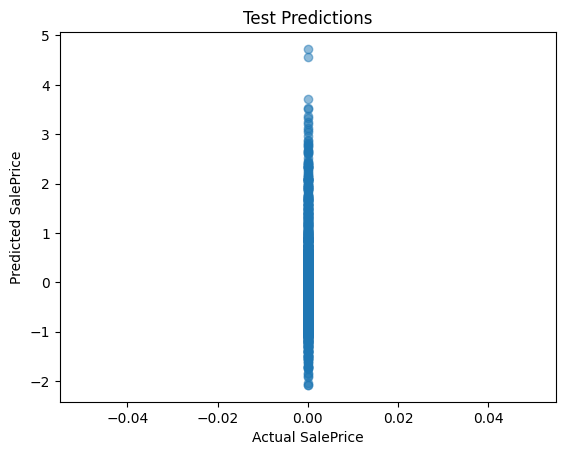

In [366]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Test Predictions")
plt.show()
